---
# Cairo University Faculty of Engineering
## Deep Learning 
## Assignment 1 

---

Please write your full name here
- **Name** : "Ahmed Hossam Aldeen"

## Table of Contents
- [Part1: Tensorflow Functions](#1)
    - [1.1 - Sigmoid function, tf.exp()](#1-1)
    - [1.2 - Sigmoid gradient](#1-2)
    - [1.3 - Reshaping arrays](#1-3)
    - [1.4 - Normalizing rows](#1-4)
        - [normalize_rows](#1-4-1)
        - [softmax](#1-4-2)
    - [2 - Vectorization](#2)
        - [2.1 - Implement the L1 and L2 loss functions](#2-1)
            - [L1](#2-1-1)
            - [L2](#2-1-2)
- [Part2: Tensorflow](#2)
    - [1.1 - Tensors](#22-1)
    - [1.2 - Tesnors Computation](#22-2)
    - [1.3 - Gradients Computation](#22-3)
        - [learning rate](#22-3-1)
    - [1.4 - Neural Network](#22-4)
        - [Data](#22-4-1)
        - [Model](#22-4-2)
        - [Model Manipulation](#22-4-3)

<a name='1'></a>
# Part1: Tensorflow functions
## **Instructions:**

- Avoid using for-loops and while-loops, unless you are explicitly told to do so.
- **Use tensorflow in all your codes unless stated otherwise**

**You only need to write code between the ### START CODE HERE ### and ### END CODE HERE ### comments.**

<a name='1-1'></a>
## 1 - Building basic functions with tensorflow ##

### 1.1 - Sigmoid function ###

**Exercise**: Build a function that returns the sigmoid of a real number x. Use math.exp(x) for the exponential function.

**Reminder**:
$sigmoid(x) = \frac{1}{1+e^{-x}}$ is sometimes also known as the logistic function. It is a non-linear function used not only in Machine Learning (Logistic Regression), but also in Deep Learning.

<img src="./images/sigmoid.png" style="width:500px;height:228px;">

In [ ]:
# GRADED FUNCTION: basic_sigmoid

import math

def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    s = 1/(1+math.exp(-x))
    ### END CODE HERE ###
    
    return s

In [ ]:
basic_sigmoid(3)

0.9525741268224334

In [ ]:
### One reason why we use "tf" instead of "math" in Deep Learning ###
x = [1, 2, 3]
basic_sigmoid(x) # you will see this give an error when you run it, because x is a vector.

TypeError: ignored

|**Exercise**: Implement the sigmoid function using TENSORFLOW. 

**Instructions**: x could now be either a real number, a vector, or a matrix. 
$$ \text{For } x \in \mathbb{R}^n \text{,     } sigmoid(x) = sigmoid\begin{pmatrix}
    x_1  \\
    x_2  \\
    ...  \\
    x_n  \\
\end{pmatrix} = \begin{pmatrix}
    \frac{1}{1+e^{-x_1}}  \\
    \frac{1}{1+e^{-x_2}}  \\
    ...  \\
    \frac{1}{1+e^{-x_n}}  \\
\end{pmatrix}\tag{1} $$

In [1]:
# GRADED FUNCTION: sigmoid

import tensorflow as tf
import numpy as np

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """
    
    ### START CODE HERE ### (≈ 1 line of code
    s = 1 / (1+ tf.math.exp(-x))  
    ### END CODE HERE ###
    
    return s

In [ ]:
x = np.array([1, 2, 3], dtype=float)
sigmoid(x)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([0.73105858, 0.88079708, 0.95257413])>

<a name='1-2'></a>
### 1.2 - Sigmoid gradient

As you've seen, you will need to compute gradients to optimize loss functions. Let's code your first gradient function.

**Exercise**: Implement the function sigmoid_grad() to compute the gradient of the sigmoid function with respect to its input x. The formula is: $$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))\tag{2}$$
You often code this function in two steps:
1. Set s to be the sigmoid of x. You might find your sigmoid(x) function useful.
2. Compute $\sigma'(x) = s(1-s)$

In [ ]:
# GRADED FUNCTION: sigmoid_derivative

def sigmoid_derivative(x):
    """
    Compute the gradient (also called the slope or derivative) of the sigmoid function with respect to its input x.
    You can store the output of the sigmoid function into variables and then use it to calculate the gradient.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    
    ### START CODE HERE ### (≈ 2 lines of code)
    sig = sigmoid(x)
    ds = sig * (1-sig)

    ### END CODE HERE ###
    
    return ds

In [ ]:
x = np.array([1, 2, 3], dtype=float)
print ("sigmoid_derivative(x) = " + str(sigmoid_derivative(x)))

sigmoid_derivative(x) = tf.Tensor([0.19661193 0.10499359 0.04517666], shape=(3,), dtype=float64)


<a name='1-3'></a>
### 1.3 - Reshaping arrays ###

Two common functions used in deep learning are [tf.shape] and [tf.reshape()]. 
- X.shape is used to get the shape (dimension) of a matrix/vector X. 
- X.reshape(...) is used to reshape X into some other dimension. 

For example, in computer science, an image is represented by a 3D array of shape $(length, height, depth = 3)$. However, when you read an image as the input of an algorithm you convert it to a vector of shape $(length*height*3, 1)$. In other words, you "unroll", or reshape, the 3D array into a 1D vector.

<img src="./images/image2vector_kiank.png" style="width:500px;height:300;">

**Exercise**: Implement `image2vector()` that takes an input of shape (length, height, 3) and returns a vector of shape (length\*height\*3, 1). For example, if you would like to reshape an array v of shape (a, b, c) into a vector of shape (a*b,c) you would do:

- Please don't hardcode the dimensions of image as a constant. Instead look up the quantities you need with `image.shape[0]`, etc. 

In [ ]:
# GRADED FUNCTION: image2vector
def image2vector(image):
    """
    Argument:
    image -- a numpy array of shape (length, height, depth)
    
    Returns:
    v -- a vector of shape (length*height*depth, 1)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    v = tf.reshape(image, [image.shape[0]*image.shape[1]*image.shape[2], 1]) 
    ### END CODE HERE ###
    
    return v

In [ ]:
# This is a 3 by 3 by 2 array, typically images will be (num_px_x, num_px_y,3) where 3 represents the RGB values
image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print ("image2vector(image) = " + str(image2vector(image)))

image2vector(image) = tf.Tensor(
[[0.67826139]
 [0.29380381]
 [0.90714982]
 [0.52835647]
 [0.4215251 ]
 [0.45017551]
 [0.92814219]
 [0.96677647]
 [0.85304703]
 [0.52351845]
 [0.19981397]
 [0.27417313]
 [0.60659855]
 [0.00533165]
 [0.10820313]
 [0.49978937]
 [0.34144279]
 [0.94630077]], shape=(18, 1), dtype=float64)


<a name='1-4'></a>
### 1.4 - Normalizing Rows ####
 

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization. Here, by normalization we mean changing x to $ \frac{x}{\| x\|} $ (dividing each row vector of x by its norm).

For example, if 
$$x = \begin{bmatrix}
        0 & 3 & 4 \\
        2 & 6 & 4 \\
\end{bmatrix}\tag{3}$$ 
then 
$$\| x\| =  \begin{bmatrix}
    5 \\
    \sqrt{56} \\
\end{bmatrix}\tag{4} $$
and
$$ x\_normalized = \frac{x}{\| x\|} = \begin{bmatrix}
    0 & \frac{3}{5} & \frac{4}{5} \\
    \frac{2}{\sqrt{56}} & \frac{6}{\sqrt{56}} & \frac{4}{\sqrt{56}} \\
\end{bmatrix}\tag{5}$$ 

Note that you can divide matrices of different sizes and it works fine: this is called broadcasting.

HINT: `keepdims`

tf.norm has another parameter `ord` where we specify the type of normalization to be done (in the exercise below you'll do 2-norm).

<a name='1-4-1'></a>
#### 1.4.1 - Normalize_rows
Implement normalizeRows() to normalize the rows of a matrix. After applying this function to an input matrix x, each row of x should be a vector of unit length (meaning length 1).

In [ ]:
# GRADED FUNCTION: normalize_rows

def normalize_rows(x):
    """
    Implement a function that normalizes each row of the matrix x (to have unit length).
    
    Argument:
    x -- A numpy matrix of shape (n, m)
    
    Returns:
    x -- The normalized (by row) numpy matrix. You are allowed to modify x.
    """
    
    #(≈ 2 lines of code)

    # YOUR CODE STARTS HERE

    # Compute x_norm as the norm 2 of x. Use np.linalg.norm(..., ord = 2, axis = ..., keepdims = True)
    x_norm = np.linalg.norm(x, ord = 2, axis = 1,  keepdims = True)

    # Divide x by its norm.
    x = x / x_norm

    # YOUR CODE ENDS HERE

    return x

In [ ]:
x = np.array([[0, 3, 4],
              [1, 6, 4]], dtype=float)
print("normalizeRows(x) = " + str(normalize_rows(x)))

normalizeRows(x) = [[0.         0.6        0.8       ]
 [0.13736056 0.82416338 0.54944226]]


**Note**:
In normalize_rows(), you can try to print the shapes of x_norm and x, and then rerun the assessment. You'll find out that they have different shapes. This is normal given that x_norm takes the norm of each row of x. So x_norm has the same number of rows but only 1 column. So how did it work when you divided x by x_norm? This is called broadcasting! 

<a name='1-4-2'></a>
#### 1.4.2 - Softmax function ####

**Exercise**: Implement a softmax function using tensorflow. You can think of softmax as a normalizing function (makes the sum of features of a sample to equal 1) used when your algorithm needs to classify two or more classes. You will learn more about softmax later in the course.

**Instructions**:
- $ \text{for } x \in \mathbb{R}^{1\times n} \text{,     } softmax(x) = softmax(\begin{bmatrix}
    x_1  &&
    x_2 &&
    ...  &&
    x_n  
\end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

- $\text{for a matrix } x \in \mathbb{R}^{m \times n} \text{,  $x_{ij}$ maps to the element in the $i^{th}$ row and $j^{th}$ column of $x$, thus we have: }$  $$softmax(x) = softmax\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{m1} & x_{m2} & x_{m3} & \dots  & x_{mn}
\end{bmatrix} = \begin{bmatrix}
    \frac{e^{x_{11}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{12}}}{\sum_{j}e^{x_{1j}}} & \frac{e^{x_{13}}}{\sum_{j}e^{x_{1j}}} & \dots  & \frac{e^{x_{1n}}}{\sum_{j}e^{x_{1j}}} \\
    \frac{e^{x_{21}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{22}}}{\sum_{j}e^{x_{2j}}} & \frac{e^{x_{23}}}{\sum_{j}e^{x_{2j}}} & \dots  & \frac{e^{x_{2n}}}{\sum_{j}e^{x_{2j}}} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    \frac{e^{x_{m1}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m2}}}{\sum_{j}e^{x_{mj}}} & \frac{e^{x_{m3}}}{\sum_{j}e^{x_{mj}}} & \dots  & \frac{e^{x_{mn}}}{\sum_{j}e^{x_{mj}}}
\end{bmatrix} = \begin{pmatrix}
    softmax\text{(first row of x)}  \\
    softmax\text{(second row of x)} \\
    ...  \\
    softmax\text{(last row of x)} \\
\end{pmatrix} $$

##### Note
Note that "m" is used to represent the "number of training examples".
Softmax should be performed for all features of each training example, so softmax would be performed on the rows.

$m$ is the number of rows and $n$ is the number of columns.

In [8]:
# GRADED FUNCTION: softmax

def softmax(x):
    """Calculates the softmax for each row of the input x.

    Your code should work for a row vector and also for matrices of shape (m,n).

    Argument:
    x -- A numpy matrix of shape (m,n)

    Returns:
    s -- A numpy matrix equal to the softmax of x, of shape (m,n)
    """
    
    ### START CODE HERE ### (≈ 3 lines of code)
    # Apply exp() element-wise to x to get x_exp. 
    x_exp = tf.math.exp(x)
    # Create a vector x_sum that sums each row of x_exp.
    x_sum = tf.reduce_sum(x_exp, axis=1, keepdims=True)
    # Compute softmax(x) by dividing results of 2 previous steps. 
    s = x_exp / x_sum
    ### END CODE HERE ###
    
    return s

In [9]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0 ,0]], dtype=float)
print("softmax(x) = " + str(softmax(x)))
print()
print("sum of each row of softmax(x) = " + str(tf.reduce_sum(softmax(x), axis=1)))

softmax(x) = tf.Tensor(
[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]], shape=(2, 5), dtype=float64)

sum of each row of softmax(x) = tf.Tensor([1. 1.], shape=(2,), dtype=float64)


**Note**:
- If you print the shapes of x_exp, x_sum and s above and rerun the assessment cell, you will see that x_sum is of shape (2,1) while x_exp and s are of shape (2,5). **x_exp/x_sum** works due to python broadcasting.

<font color='blue'>
**What you need to remember:**

- tf.exp(x) works for any np.array x and applies the exponential function to every coordinate
- the sigmoid function and its gradient
- image2vector is commonly used in deep learning
- tf.reshape is widely used. In the future, you'll see that keeping your matrix/vector dimensions straight will go toward eliminating a lot of bugs. 
- broadcasting is extremely useful

<a name='1-2'></a>
## 2 - Vectorization

In deep learning, you deal with very large datasets. Hence, a non-computationally-optimal function can become a huge bottleneck in your algorithm and can result in a model that takes ages to run. To make sure that your code is computationally efficient, you will use vectorization. 

<a name='2-1'></a>
### 2.1 Implement the L1 and L2 loss functions
<a name='2-1-1'></a>
#### 2.1.1 L1 loss:
**Exercise**: Implement the vectorized version of the L1 loss. You may find the function abs(x) (absolute value of x) useful.

**Reminder**:
- The loss is used to evaluate the performance of your model. The bigger your loss is, the more different your predictions ($ \hat{y} $) are from the true values ($y$). In deep learning, you use optimization algorithms like Gradient Descent to train your model and to minimize the cost.
- L1 loss is defined as:
$$\begin{align*} & L_1(\hat{y}, y) = \frac{1}{m}\sum_{i=0}^m|y^{(i)} - \hat{y}^{(i)}| \end{align*}\tag{6}$$

In [ ]:
# GRADED FUNCTION: L1
def L1(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L1 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    loss = (1/len(y)) * np.sum(abs(y-yhat))
    ### END CODE HERE ###
    
    return loss

In [ ]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L1 = " + str(L1(yhat,y)))

L1 = 0.22000000000000003


<a name='2-1-2'></a>
#### 2.1.2 L2 loss:
**Exercise**: Implement the vectorized version of the L2 loss. There are several way of implementing the L2 loss. 

- L2 loss is defined as $$\begin{align*} & L_2(\hat{y},y) = \frac{1}{m}\sum_{i=0}^m(y^{(i)} - \hat{y}^{(i)})^2 \end{align*}\tag{7}$$

In [ ]:
# GRADED FUNCTION: L2

def L2(yhat, y):
    """
    Arguments:
    yhat -- vector of size m (predicted labels)
    y -- vector of size m (true labels)
    
    Returns:
    loss -- the value of the L2 loss function defined above
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    loss = (1/len(y)) * np.sum((y-yhat)**2)
    ### END CODE HERE ###
    
    return loss

In [ ]:
yhat = np.array([.9, 0.2, 0.1, .4, .9])
y = np.array([1, 0, 0, 1, 1])
print("L2 = " + str(L2(yhat,y)))

L2 = 0.08600000000000001


<font color='blue'>
**What to remember:**

- Vectorization is very important in deep learning. It provides computational efficiency and clarity.
- You have reviewed the L1 and L2 loss.
- You are familiar with many tensorflow functions etc...

<a name='2'></a>
# Part2: Intro to TensorFlow

In this assignment, you'll get exposure to using TensorFlow and learn how it can be used for solving deep learning tasks. Go through the code and run each cell. Along the way, you'll encounter several ***TODO*** blocks -- follow the instructions to fill them out before running those cells and continuing.

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

<a name='22-1'></a>
## 1.1 Why is TensorFlow called TensorFlow?

TensorFlow is called 'TensorFlow' because it handles the flow (node/mathematical operation) of Tensors, which are data structures that you can think of as multi-dimensional arrays.
The ```shape``` of a Tensor defines its number of dimensions and the size of each dimension. The ```rank``` of a Tensor provides the number of dimensions (n-dimensions) -- you can also think of this as the Tensor's order or degree.

In [ ]:
### Defining higher-order Tensors ###

'''TODO: Define a 2-d Tensor'''
matrix = tf.constant([[1, 1, 1, 1],
                         [3, 3, 3, 3]])

assert isinstance(matrix, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(matrix).numpy() == 2

In [ ]:
'''TODO: Define a 4-d Tensor.'''
# Use tf.zeros to initialize a 4-d Tensor of zeros with size 10 x 256 x 256 x 3. 
#   You can think of this as 10 images where each image is RGB 256 x 256.
images =  tf.zeros((10,256,256,3))

assert isinstance(images, tf.Tensor), "matrix must be a tf Tensor object"
assert tf.rank(images).numpy() == 4, "matrix must be of rank 4"
assert tf.shape(images).numpy().tolist() == [10, 256, 256, 3], "matrix is incorrect shape"

<a name='22-1'></a>
## 1.2 Computations on Tensors

A convenient way to think about and visualize computations in TensorFlow is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using TensorFlow:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/add-graph.png)

In [ ]:
# Create the nodes in the graph, and initialize values
a = tf.constant(15)
b = tf.constant(61)

# Add them!
c1 = tf.add(a,b)
c2 = a + b # TensorFlow overrides the "+" operation so that it is able to act on Tensors
print(c1)
print(c2)

tf.Tensor(76, shape=(), dtype=int32)
tf.Tensor(76, shape=(), dtype=int32)


Notice how we've created a computation graph consisting of TensorFlow operations, and how  the output is a Tensor with value 76 -- we've just created a computation graph consisting of operations, and it's executed them and given us back the result.

Now let's consider a slightly more complicated example:

![alt text](https://raw.githubusercontent.com/aamini/introtodeeplearning/master/lab1/img/computation-graph.png)

Here, we take two inputs, `a, b`, and compute an output `e`. Each node in the graph represents an operation that takes some input, does some computation, and passes its output to another node.

Let's define a simple function in TensorFlow to construct this computation function:

In [ ]:
### Defining Tensor computations ###

# Construct a simple computation function
def func(a,b):
  '''TODO: Define the operation for c, d, e (use tf.add, tf.subtract, tf.multiply).'''
  c = tf.add(a,b)
  d = tf.subtract(b,1)
  e = tf.multiply(c,d)
  return e

Now, we can call this function to execute the computation graph given some inputs `a,b`:

In [ ]:
# Consider example values for a,b
a, b = 1.5, 2.5
# Execute the computation
e_out = func(a,b)
print(e_out)

tf.Tensor(6.0, shape=(), dtype=float32)


Notice how our output is a Tensor with value defined by the output of the computation, and that the output has no shape as it is a single scalar value.

## 1.3 Gradients Computations

<a name='22-3'></a>

In [ ]:
### Gradient computation with GradientTape ###

# y = x^2
# Example: x = 3.0
x = tf.Variable(3.0)

# Initiate the gradient tape
with tf.GradientTape() as tape:
  # Define the function
  y = x * x
# Access the gradient -- derivative of y with respect to x
dy_dx = tape.gradient(y, x)

assert dy_dx.numpy() == 6.0

In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how `GradientTape` can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of
$$L=(w*x-y_{true})^2$$
Here $y_{true}$ is a variable for a desired value we are trying to optimize for; $x = 1.0$  is feature value for one sample; $w$ is weight we are trying to find; $L$ represents a loss that we are trying to  minimize. While we can clearly solve this problem analytically ($w_{min}=\frac{y_{true}}{x}$), considering how we can compute this using `GradientTape` sets us up nicely for future assignments where we use gradient descent to optimize entire neural network losses.

Initializing w=[[0.26099402]]


Text(0, 0.5, 'w value')

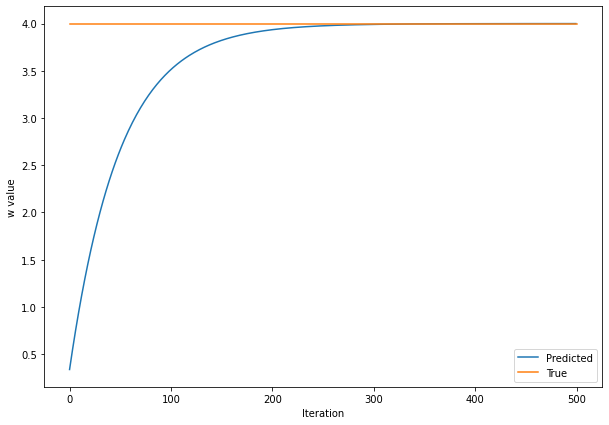

In [ ]:
### Function minimization with automatic differentiation and SGD ###
import matplotlib.pyplot as plt
# Initialize a random value for our initial x
w = tf.Variable([tf.random.normal([1])])
print("Initializing w={}".format(w.numpy()))
x = 1.0


learning_rate = 1e-2 # learning rate for SGD
history = []
# Define the target value
y_true = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    with tf.GradientTape() as tape:
        '''TODO: define the loss as described above'''
        loss = (w*x - y_true)**2 # TODO

  # loss minimization using gradient tape
    grad = tape.gradient(loss, w) # TODO: compute the derivative of the loss with respect to w
    new_w = w - learning_rate * grad # TODO: sgd update
    w.assign(new_w) # update the value of x
    history.append(w.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
fig = plt.figure(figsize = (10,7))
plt.plot(history)
plt.plot([0, 500],[y_true,y_true])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('w value')

The following cell shows the evolution of the x value during gradien descent starting from initial x value

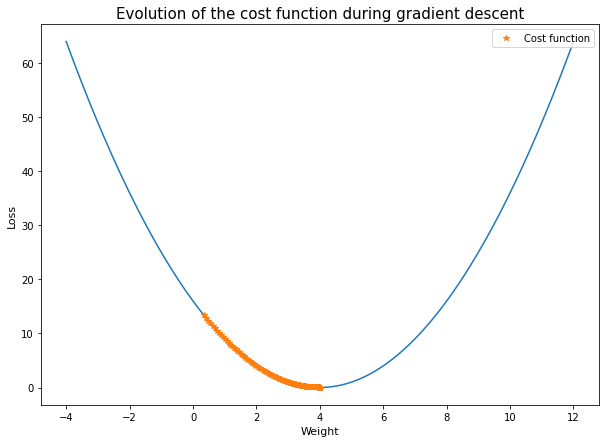

In [ ]:
x_f=y_true
w = np.linspace(-4, 12, 200)
y = (w*x-x_f)**2
y_pred = (np.array(history)-x_f)**2
fig = plt.figure(figsize = (10,7))
plt.title("Evolution of the cost function during gradient descent", fontsize=15)
plt.plot(w,y)
plt.plot(history, y_pred,'*', label = "Cost function")
plt.xlabel('Weight', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend(loc = "upper right")
plt.show()

<a name='22-3-1'></a>
#### Learning Rate

**Exercise**: Try the previous code blocks with learning rates [0.1, 0.00005]

Initializing w=[[0.51563025]]


Text(0, 0.5, 'w value')

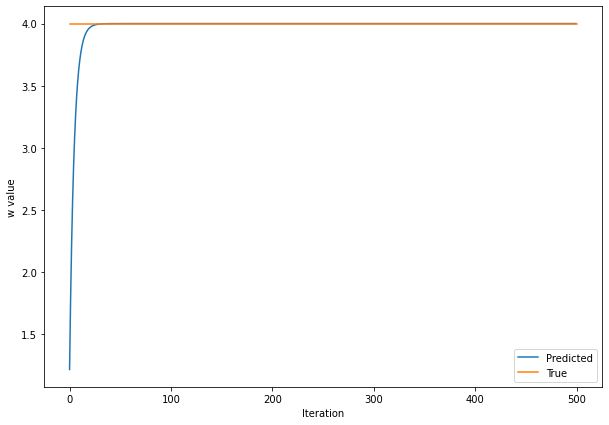

In [ ]:
## TODO
#### Implement SGD with learning_rate = 0.1

import matplotlib.pyplot as plt
# Initialize a random value for our initial x
w = tf.Variable([tf.random.normal([1])])
print("Initializing w={}".format(w.numpy()))
x = 1.0


learning_rate = 0.1 # learning rate for SGD
history = []
# Define the target value
y_true = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    with tf.GradientTape() as tape:
        '''TODO: define the loss as described above'''
        loss = (w*x - y_true)**2 # TODO

  # loss minimization using gradient tape
    grad = tape.gradient(loss, w) # TODO: compute the derivative of the loss with respect to x
    new_w = w - learning_rate * grad # TODO: sgd update
    w.assign(new_w) # update the value of x
    history.append(w.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
fig = plt.figure(figsize = (10,7))
plt.plot(history)
plt.plot([0, 500],[y_true,y_true])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('w value')

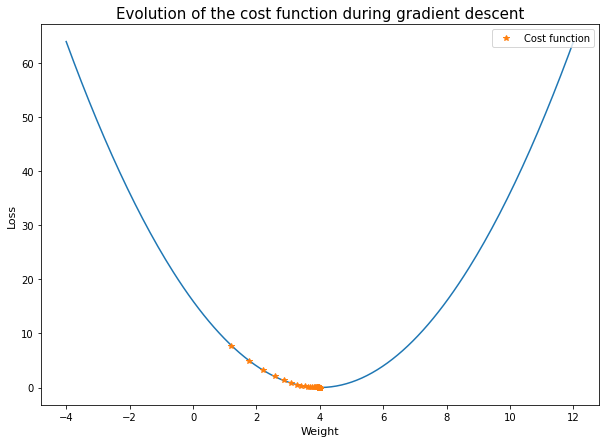

In [ ]:
## TODO
#### Plot x value evolution

x_f=y_true
w = np.linspace(-4, 12, 200)
y = (w*x-x_f)**2
y_pred = (np.array(history)-x_f)**2
fig = plt.figure(figsize = (10,7))
plt.title("Evolution of the cost function during gradient descent", fontsize=15)
plt.plot(w,y)
plt.plot(history, y_pred,'*', label = "Cost function")
plt.xlabel('Weight', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend(loc = "upper right")
plt.show()

Initializing w=[[0.7816322]]


Text(0, 0.5, 'w value')

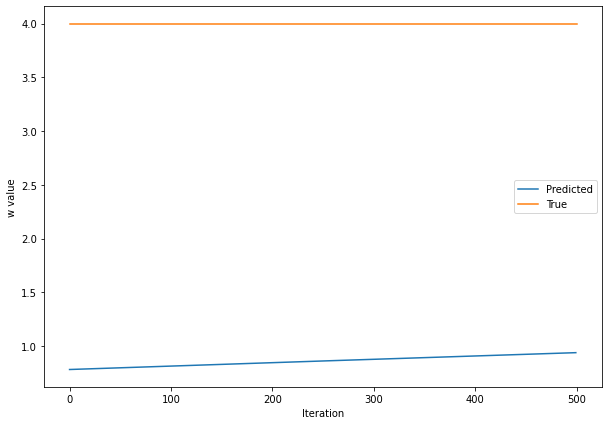

In [ ]:
## TODO
#### Implement SGD with learning_rate = 0.00005

import matplotlib.pyplot as plt
# Initialize a random value for our initial x
w = tf.Variable([tf.random.normal([1])])
print("Initializing w={}".format(w.numpy()))
x = 1.0


learning_rate = 0.00005 # learning rate for SGD
history = []
# Define the target value
y_true = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss, 
#   compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    with tf.GradientTape() as tape:
        '''TODO: define the loss as described above'''
        loss = (w*x - y_true)**2 # TODO

  # loss minimization using gradient tape
    grad = tape.gradient(loss, w) # TODO: compute the derivative of the loss with respect to x
    new_w = w - learning_rate * grad # TODO: sgd update
    w.assign(new_w) # update the value of x
    history.append(w.numpy()[0])

# Plot the evolution of x as we optimize towards x_f!
fig = plt.figure(figsize = (10,7))
plt.plot(history)
plt.plot([0, 500],[y_true,y_true])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('w value')

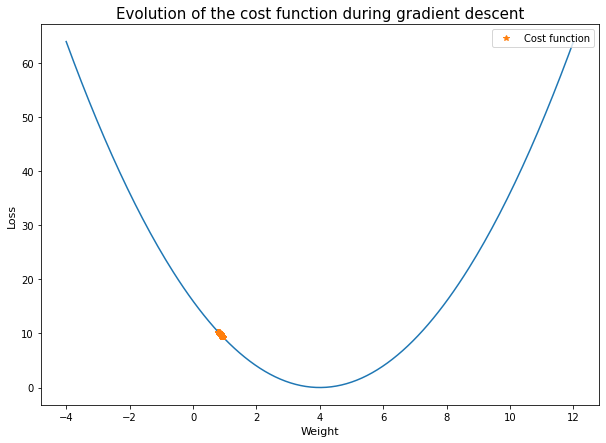

In [ ]:
## TODO
#### Plot x value evolution

x_f=y_true
w = np.linspace(-4, 12, 200)
y = (w*x-x_f)**2
y_pred = (np.array(history)-x_f)**2
fig = plt.figure(figsize = (10,7))
plt.title("Evolution of the cost function during gradient descent", fontsize=15)
plt.plot(w,y)
plt.plot(history, y_pred,'*', label = "Cost function")
plt.xlabel('Weight', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.legend(loc = "upper right")
plt.show()

`GradientTape` provides an extremely flexible framework for automatic differentiation. In order to back propagate errors through a neural network, we track forward passes on the Tape, use this information to determine the gradients, and then use these gradients for optimization using SGD.

<a name='22-4'></a>
## 1.4 A neural Network

In the tutorial we learned how to create a network model that predicts the handwritten digits from the MNIST dataset. This time we are trying recognize different items of clothing, trained from a dataset containing 10 different types.

The Fashion MNIST data is available directly in the tf.keras datasets API. You load it like this:

<a name='22-4-1'></a>
### Question 1 Loading and Viewing data

The Fashion MNIST data is available directly in the tf.keras datasets API. 
- **Q** Load it like we did in the tutorial from keras.

In [10]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The Fashion MNIST data is available directly in the tf.keras datasets API. 
- **Q** Normalize it like we did in the tutorial.

In [11]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

- **Q** Display 10 *random* images from the training images.

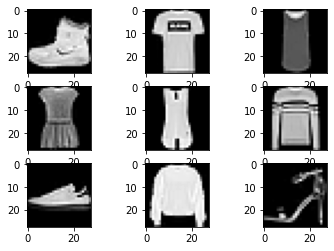

In [12]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

<a name='22-4-2'></a>

### Question 2 The Model

Let's now design the model. Run the following cells

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4761 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3603 - accuracy: 0.8685
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3218 - accuracy: 0.8816
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2995 - accuracy: 0.8885
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.8975


Run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. The output, after you run it is a list of numbers.

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 0s 2ms/step
[3.2998727e-07 1.7906302e-08 4.7067150e-09 1.0800252e-09 7.0757977e-09
 9.1455467e-03 5.3602031e-07 1.5920132e-02 2.7153655e-08 9.7493345e-01]


Hint: try running print(test_labels[0]) -- and you'll get a 9. Does that help you understand why this list looks the way it does? 

In [ ]:
print(test_labels[0])

9


- **Q** What does this list represent?


1.   It's 10 random meaningless values
2.   It's the first 10 classifications that the computer made
3.   It's the probability that this item is each of the 10 classes


- Ans: 3

**Q** How do you know that this list tells you that the item is an ankle boot?


1.   There's not enough information to answer that question
2.   The 10th element on the list is the biggest, and the ankle boot is labelled 9
2.   The ankle boot is label 9, and there are 0->9 elements in the list


- Ans: 2

### Question 3 Model Manipulation
<a name='22-4-3'></a>

Let's now look at the layers in your model. Experiment with different values for the dense layer. What different results do you get for loss, training time etc? Why do you think that's the case? 


**Q** Increase to 1024 Neurons -- What's the impact?

1. Training takes longer, but is more accurate
2. Training takes longer, but no impact on accuracy
3. Training takes the same time, but is more accurate


- Ans: 3

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4727 - accuracy: 0.8292
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3590 - accuracy: 0.8678
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3207 - accuracy: 0.8819
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2960 - accuracy: 0.8899
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[1.6676922e-09 7.4505575e-11 4.5054474e-10 1.3059820e-12 2.9780381e-10
 5.1452192e-03 1.6656927e-09 8.0954842e-04 2.4564999e-09 9.9404526e-01]
9


**Q** What would happen if you remove the Flatten() layer. Why do you think that's the case? 

- Ans: We get an error because the Flatten() layer collapses the spatial dimensions of the input into the channel dimension. For example, if the input to the layer is an H-by-W-by-C-by-N-by-S array (sequences of images), then the flattened output is an (H*W*C)-by-N-by-S array

In [13]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

**Q** Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? For example, try training the network with 5

- Ans: Because we have 10 classes in the dataset so when we change it to only 5 we get the NaN loss

In [14]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])


model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: nan
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: nan
Epoch 5/5
313/313 [==============================] - 0s 1ms/step
[nan nan nan nan nan]
9


**Q** Before you trained, you normalized the data, going from values that were 0-255 to values that were 0-1. What would be the impact of removing that? Here's the complete code to give it a try. Why do you think you get different results? 

- Ans: Normalization can help training of our neural networks as the different features are on a similar scale, which helps to stabilize the gradient descent step, allowing us to use larger learning rates or help models converge faster for a given learning rate

In [ ]:
#### CODE FOR DATA NOT NORMALIZED

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.5387
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3463
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2865
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2609
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2322


In [ ]:
#### CODE FOR DATA NORMALIZED

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images = training_images / 255.0


model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1991
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0802
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0527
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0363
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0272


References:
- MIT 6.S191
- DL.ai
